<a href="https://colab.research.google.com/github/project-ida/two-state-quantum-systems/blob/master/05-excitation-transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <a href="https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/05-excitation-transfer.ipynb" target="_parent"><img src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# 5 - Excitation transfer

> TODO: Description

In [1]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import Image
import gif
import numpy as np
import pandas as pd
from qutip import *
import warnings
warnings.filterwarnings('ignore')
from itertools import product
import os

# Functions created in 04 tutorial

from libs.helper_05_tutorial import *

H_latex = "$H = (\Delta E / 2) \sigma_z + \hbar\omega(a^{{\dagger}}a +1/2) + U( a^{{\dagger}} + a )\sigma_x$"


In [4]:
def make_operators(max_bosons, parity=0):
    
    a        = tensor(destroy(max_bosons+1), qeye(2), qeye(2))     # tensorised boson destruction operator
    number   = tensor(num(max_bosons+1), qeye(2), qeye(2))         # tensorised boson number operator
    sx1      = tensor(qeye(max_bosons+1), sigmax(), qeye(2))       # tensorised sigma_x operator 1
    sx2      = tensor(qeye(max_bosons+1), qeye(2), sigmax())       # tensorised sigma_x operator 2
    sz1      = tensor(qeye(max_bosons+1), sigmaz(), qeye(2))        # tensorised sigma_z operator 1 
    sz2      = tensor(qeye(max_bosons+1), qeye(2), sigmaz())        # tensorised sigma_z operator 2
    
    two_state_1    =    1/2*sz1                # two state system energy operator 1
    two_state_2    =    1/2*sz2                # two state system energy operator 2
    bosons         =   (number+0.5)             # boson energy operator
    interaction_1  =    (a.dag() + a) * sx1     # interaction energy operator 1
    interaction_2  =    (a.dag() + a) * sx2     # interaction energy operator 2 
    
    P = (sz1+sz2)*(1j*np.pi*number).expm()                      # parity operator 
    
    # map from QuTiP number states to |n,±> states
    possible_ns = range(0, max_bosons+1)
    possible_ms = ["+","-"]
    nm_list = [(n,m1,m2) for (n,m1,m2) in product(possible_ns, possible_ms, possible_ms)]
    
    # only do parity extraction if a valid parity is being used
    if (parity==1) | (parity==-1):
        p           = np.where(P.diag()==parity)[0]
        
        two_state   = two_state.extract_states(p)
        bosons      = bosons.extract_states(p)
        number      = number.extract_states(p)
        interaction = interaction.extract_states(p)
        nm_list     = [nm_list[i] for i in p]
    
    
    return two_state_1, two_state_2, bosons, interaction_1, interaction_2, number, nm_list

In [11]:
def make_braket_labels(nm_list):
    bra_labels = ["$\langle$"+str(n)+", "+str(m1)+", "+str(m2)+" |" for (n,m1,m2) in nm_list]
    ket_labels = ["| "+str(n)+", "+str(m1)+", "+str(m2)+"$\\rangle$" for (n,m1,m2) in nm_list]
    return bra_labels, ket_labels

In [91]:
two_state_1, two_state_2, bosons, interaction_1, interaction_2, number, nm_list = make_operators(max_bosons=2)

In [92]:
bra_labels, ket_labels = make_braket_labels(nm_list)

In [93]:
H = 1*two_state_1+ 1*two_state_2 + 1*bosons + 1*interaction_1 + 1*interaction_2

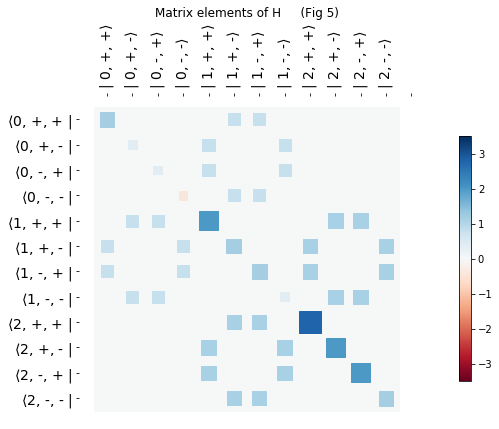

In [94]:
f, ax = hinton(H, xlabels=ket_labels, ylabels=bra_labels)
ax.tick_params(axis='x',labelrotation=90,)
ax.set_title("Matrix elements of H     (Fig 5)");

In [95]:
H = 10*two_state_1+ 10*two_state_2 + 1*bosons + 0.001*interaction_1 + 0.001*interaction_2

In [96]:
nm_list

[(0, '+', '+'),
 (0, '+', '-'),
 (0, '-', '+'),
 (0, '-', '-'),
 (1, '+', '+'),
 (1, '+', '-'),
 (1, '-', '+'),
 (1, '-', '-'),
 (2, '+', '+'),
 (2, '+', '-'),
 (2, '-', '+'),
 (2, '-', '-')]

In [97]:
psi0 = basis(len(nm_list), 1)

In [98]:
times = np.linspace(0.0, 1000.0, 1000)
P, psi = simulate(H, psi0, times)

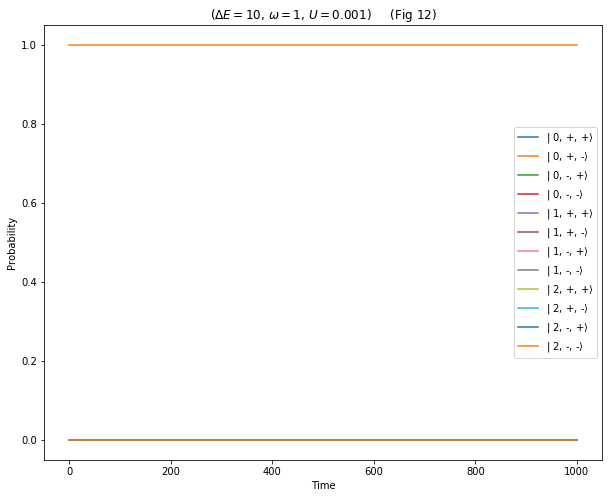

In [99]:
plt.figure(figsize=(10,8))
for i in range(0,P.shape[0]):
    plt.plot(times, P[i,:], label=f"{ket_labels[i]}")
plt.ylabel("Probability")
plt.xlabel("Time")
plt.legend(loc="right")
plt.title("($\Delta E=10$, $\omega=1$, $U=0.001$)     (Fig 12)")
plt.show();

In [100]:
times = np.linspace(0.0, 100000000.0, 10000) # simulation time
P, psi = simulate(H, psi0, times)

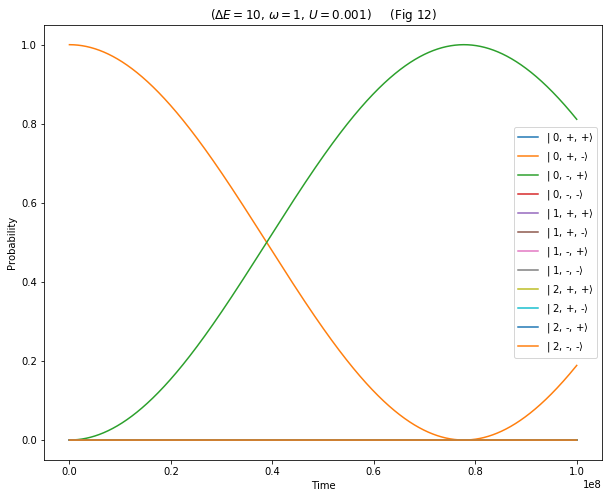

In [101]:
plt.figure(figsize=(10,8))
for i in range(0,P.shape[0]):
    plt.plot(times, P[i,:], label=f"{ket_labels[i]}")
plt.ylabel("Probability")
plt.xlabel("Time")
plt.legend(loc="right")
plt.title("($\Delta E=10$, $\omega=1$, $U=0.001$)     (Fig 12)")
plt.show();